# EDA Project
데이터로 탐험을 떠나요! 🏃‍♀️🏃‍♂️

Day 3 마지막 부분에서 소개해드린 EDA를 진행해주세요.

1. 여러분이 선호하는 데이터셋을 선정해주세요
2. 이 데이터셋에 대한 여러 가설을 세워주세요.
3. 가설을 증명하기 위한 여러 데이터 분석 / 시각화를 진행해주세요.


## Load

In [27]:
# Load Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 데이터 구조 훝어보기

In [28]:
housing = pd.read_csv('housing.csv')
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [29]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:

housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [32]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


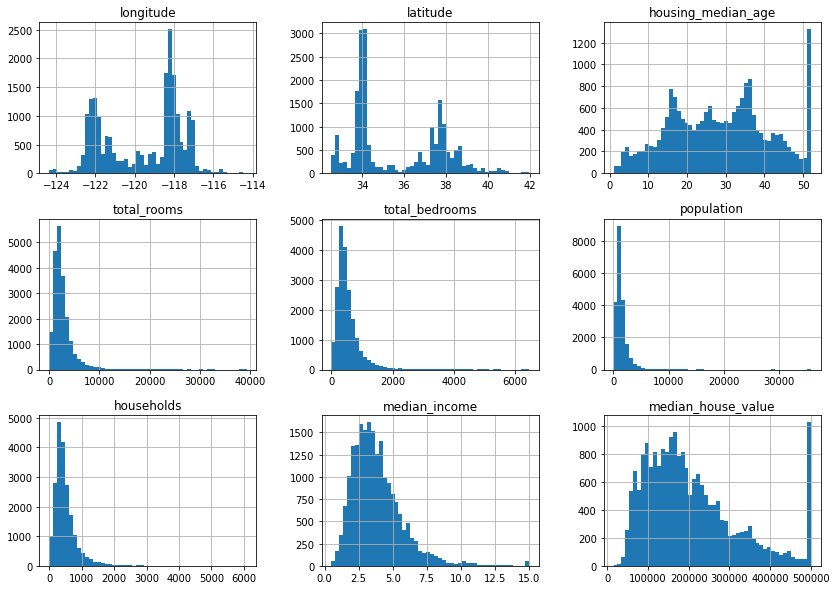

In [33]:
housing.hist(bins=50, figsize=(14,10));

다음의 사항 확인 가능

1. `median_income`은 스케일된 수치이다.
2. `housing_median_age` 와 `median_house_value`는 최댓값과 최솟값을 한정했다.
3. feature들의 스케일이 각각 다르다.
4. 분포가 종모양이 되도록 변화 필요

## Data Visualization

### 지리 데이터 시각화

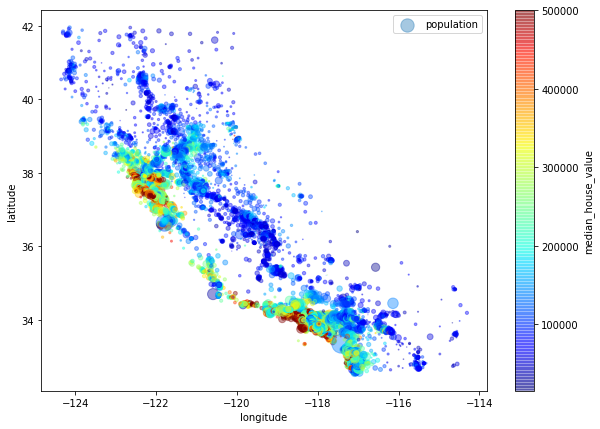

In [34]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False);

plt.legend()
plt.show()

### 상관관계 조사

In [35]:
corr_matirx = housing.corr()

In [36]:
corr_matirx.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

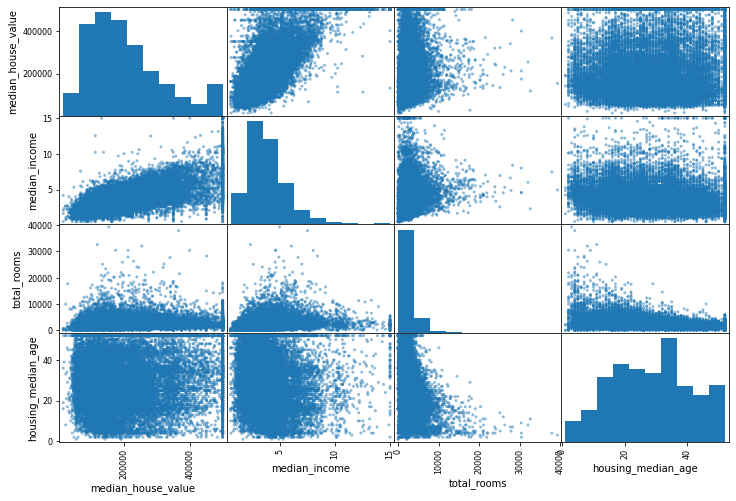

In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['median_house_value', 'median_income', 'total_rooms','housing_median_age']], figsize=(12,8));

<AxesSubplot:>

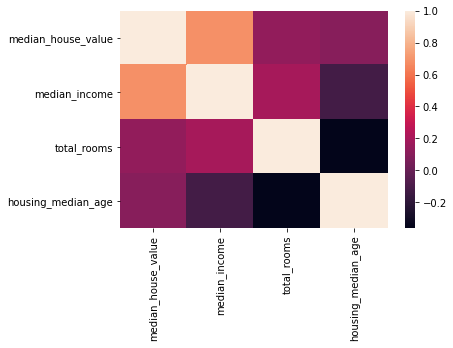

In [38]:
sns.heatmap(housing[['median_house_value', 'median_income', 'total_rooms','housing_median_age']].corr())

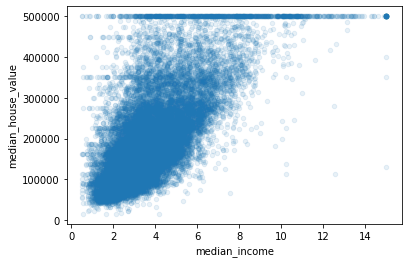

In [39]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);

위 산점도를 통해 다음과 같은 사항을 확인 할 수 있다.

1. 강한 산점도
2. 제한값(500,000)에서 많은 값들이 존재

### 특성 조합으로 실험

특성을 조합해서 새로운 특성을 추가

- 가구당 방 갯수
- 방 당 침대수 
- 가구당 인구수

In [40]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [41]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260


In [42]:
corr_matirx = housing.corr()
corr_matirx.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

### ocean_proximity

In [43]:
housing[['ocean_proximity', 'median_house_value']]

,ocean_proximity,median_house_value
0,NEAR BAY,452600.0
1,NEAR BAY,358500.0
2,NEAR BAY,352100.0
3,NEAR BAY,341300.0
4,NEAR BAY,342200.0
...,...,...
20635,INLAND,78100.0
20636,INLAND,77100.0
20637,INLAND,92300.0
20638,INLAND,84700.0


In [44]:
housing[['ocean_proximity', 'median_house_value']].groupby('ocean_proximity').mean()

,median_house_value
ocean_proximity,
<1H OCEAN,240084.285464
INLAND,124805.392001
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427


In [45]:
housing[['ocean_proximity', 'median_house_value']].groupby('ocean_proximity').median()

,median_house_value
ocean_proximity,
<1H OCEAN,214850.0
INLAND,108500.0
ISLAND,414700.0
NEAR BAY,233800.0
NEAR OCEAN,229450.0


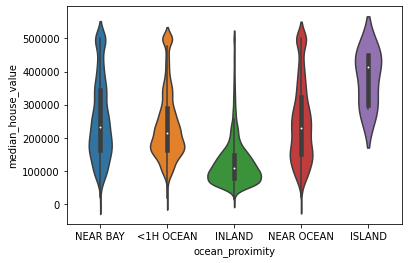

In [46]:
sns.violinplot(x='ocean_proximity', y='median_house_value', data=housing);

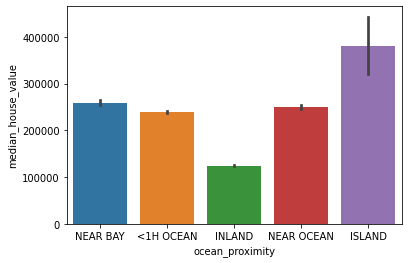

In [47]:
sns.barplot(x='ocean_proximity', y='median_house_value', data=housing);

In [48]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

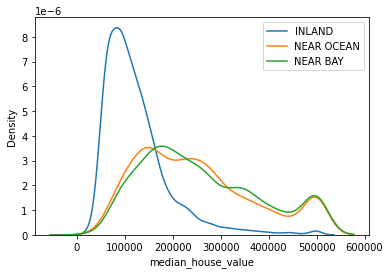

In [49]:
sns.kdeplot(x=housing[housing.ocean_proximity=='INLAND']['median_house_value'], label='INLAND')
sns.kdeplot(x=housing[housing.ocean_proximity=='NEAR OCEAN']['median_house_value'], label='NEAR OCEAN')
sns.kdeplot(x=housing[housing.ocean_proximity=='NEAR BAY']['median_house_value'], label='NEAR BAY')
plt.legend()
plt.show()

### ocean_proximity vs. median_income

In [50]:
housing[['ocean_proximity', 'median_income']].groupby('ocean_proximity').mean().sort_values(by='median_income', ascending=False)

,median_income
ocean_proximity,
<1H OCEAN,4.230682
NEAR BAY,4.172885
NEAR OCEAN,4.005785
INLAND,3.208996
ISLAND,2.744420


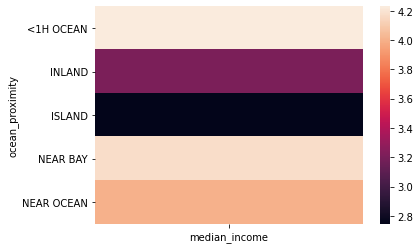

In [51]:
sns.heatmap(housing[['ocean_proximity', 'median_income']].groupby('ocean_proximity').mean());